In [1]:
import os
import pandas as pd 
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
import pltfont
pltfont.auto()

✅ 현재 폰트 적용됨: Arial Unicode MS


In [2]:
data_path = "/Users/jun/GitStudy/commerceAB/data/thelook_ecommerce"
data_list = os.listdir(data_path)
data_list.sort()
data_list

['distribution_centers_gzip.parquet',
 'inventory_items_gzip.parquet',
 'order_items_gzip.parquet',
 'orders_gzip.parquet',
 'products_gzip.parquet',
 'users_gzip.parquet']

In [3]:
cols = [i.rstrip("_gzip.parquet") for i in data_list ]

cols

['distribution_centers',
 'inventory_items',
 'order_items',
 'orders',
 'products',
 'users']

In [4]:
distribution_centers_file_path = data_path + "/distribution_centers_gzip.parquet"
distribution_centers_df = pd.read_parquet(distribution_centers_file_path, engine='pyarrow')  # 또는 engine='fastparquet

In [5]:
distribution_centers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        10 non-null     Int64  
 1   name                      10 non-null     object 
 2   latitude                  10 non-null     float64
 3   longitude                 10 non-null     float64
 4   distribution_center_geom  10 non-null     object 
dtypes: Int64(1), float64(2), object(2)
memory usage: 542.0+ bytes


In [6]:
distribution_centers_df.describe(include='all',datetime_is_numeric=True)

,id,name,latitude,longitude,distribution_center_geom
count,10.0,10,10.000000,10.000000,10
unique,<NA>,10,NaN,NaN,10
top,<NA>,Memphis TN,NaN,NaN,POINT(-89.9711 35.1174)
freq,<NA>,1,NaN,NaN,1
mean,5.5,NaN,34.679310,-87.938550,NaN
std,3.02765,NaN,4.572666,12.722916,NaN
min,1.0,NaN,29.760400,-118.250000,NaN
25%,3.25,NaN,31.024975,-90.042800,NaN
50%,5.5,NaN,33.416650,-87.863900,NaN
75%,7.75,NaN,38.741850,-80.229150,NaN


In [7]:
distribution_centers_df.isnull().sum()

id                          0
name                        0
latitude                    0
longitude                   0
distribution_center_geom    0
dtype: int64

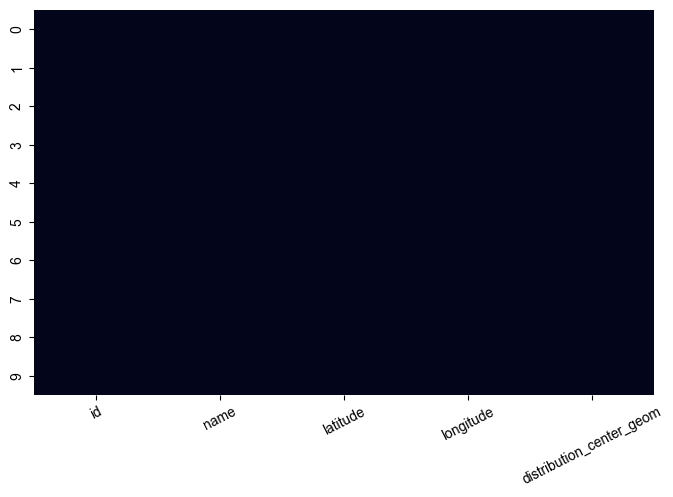

In [8]:
plt.figure(figsize=(8,5))  # 전체 그림 크기 지정
sns.heatmap(distribution_centers_df.isnull(), cbar=False)
plt.xticks(rotation=27)  # x축 라벨 기울이기
plt.show()